# Individual Algo Strong Scaling (input types on same plots)

In [1]:
!pip install llnl-thicket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.2 MB/s eta 0:00:00


In [2]:
import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Mounted at /content/drive
/content/drive/My Drive/thicket-practice


Read in all the files

In [5]:
tk = th.Thicket.from_caliperreader(glob("merge_mpi_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [6]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              6222213         16.583746   
                                                  8654018          5.934962   
                                                  65364533         0.788291   
                                                  83147926        13.077885   
                                                  108340675        6.927706   
                                                  113649686       19.089650   
                                                  124517305        0.771172   
                                                  142231215        0.508345   
                                                  147753700        0.548983   
                                                  150738664        0.532398   
                                                  156047618        8.357334   
                                                  195167352        0.573237   
                                                  223604819        0.886345   
                                                  250811712        0.404289   
                                                  256601229        9.248942   
                                                  280790330       27.601063   
                                                  323337785       25.932993   
                                                  327768957       26.306306   
                                                  343605715        1.107286   
                                                  356130471        1.794932   
                                                  376878331        3.408614   
                                                  391560635        1.471097   
                                                  402246789       14.125322   
                                                  429575901        3.190064   
                                                  440311480        0.990349   
                                                  442415665        1.494236   
                                                  442775966        0.755487   
                                                  446891881        0.814511   
                                                  466359386        8.035825   
                                                  483442337        8.651232   
                                                  492146754        4.509099   
                                                  497271456        9.755237   
                                                  497651054       28.022578   
                                                  514764303       36.090118   
                                                  585839645       26.324211   
                                                  606493607        2.503674   
                                                  640602562        1.798493   
                                                  668803083        9.698750   
                                                  671331609        1.406953   
                                                  672587892       25.968184   
                                                  678281950        3.345770   
                                                  679404600        2.495097   
                                                  683898562        0.598936   
                                                  687300418        3.474556   
                                                  693048497        0.526261   
                                                  706685210        0.394045   
                                                  717770186        2.409186   
                                                  745352312       26.123176   
                                                  746663286       27.599465   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [7]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Recv
│     ├─ 1.000 MPI_Scatter
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init



In [8]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
6222213              2.11.0-dev               4   
8654018              2.11.0-dev              64   
65364533             2.11.0-dev              16   
83147926             2.11.0-dev             128   
108340675            2.11.0-dev               2   
113649686            2.11.0-dev             512   
124517305            2.11.0-dev              16   
142231215            2.11.0-dev               2   
147753700            2.11.0-dev               4   
150738664            2.11.0-dev               8   
156047618            2.11.0-dev             128   
195167352            2.11.0-dev               8   
223604819            2.11.0-dev               8   
250811712            2.11.0-dev               4   
256601229            2.11.0-dev             512   
280790330            2.11.0-dev               2   
323337785            2.11.0-dev            1024   
327768957            2.11.0-dev            1024   
343605715            2.11.0-dev               4   
356130471            2.11.0-dev               4   
376878331            2.11.0-dev             256   
391560635            2.11.0-dev              32   
402246789            2.11.0-dev               4   
429575901            2.11.0-dev             256   
440311480            2.11.0-dev              16   
442415665            2.11.0-dev               4   
442775966            2.11.0-dev              16   
446891881            2.11.0-dev              16   
466359386            2.11.0-dev             512   
483442337            2.11.0-dev             512   
492146754            2.11.0-dev               8   
497271456            2.11.0-dev             512   
497651054            2.11.0-dev            1024   
514764303            2.11.0-dev            1024   
585839645            2.11.0-dev               4   
606493607            2.11.0-dev              64   
640602562            2.11.0-dev              16   
668803083            2.11.0-dev             512   
671331609            2.11.0-dev              32   
672587892            2.11.0-dev            1024   
678281950            2.11.0-dev             256   
679404600            2.11.0-dev             128   
683898562            2.11.0-dev               2   
687300418            2.11.0-dev             256   
693048497            2.11.0-dev               8   
706685210            2.11.0-dev               4   
717770186            2.11.0-dev               8   
745352312            2.11.0-dev            1024   
746663286            2.11.0-dev               2   
752637709            2.11.0-dev              64   
775259206            2.11.0-dev               4   
787759768            2.11.0-dev            1024   
792957775            2.11.0-dev               2   
798833536            2.11.0-dev             256   
847023067            2.11.0-dev             128   
873438930            2.11.0-dev             128   
904480258            2.11.0-dev              16   
919199520            2.11.0-dev             256   
922653823            2.11.0-dev            1024   
928804105            2.11.0-dev              64   
938271588            2.11.0-dev              64   
982372139            2.11.0-dev               2   
985392218            2.11.0-dev              16   
1008440072           2.11.0-dev              32   
1009408275           2.11.0-dev               4   
1009855248           2.11.0-dev              64   
1071160307           2.11.0-dev               2   
1109267855           2.11.0-dev              32   
1117446283           2.11.0-dev              32   
1155265737           2.11.0-dev               4   
1166755277           2.11.0-dev               8   
1177683944           2.11.0-dev              64   
1208412274           2.11.0-dev             512   
1221688842           2.11.0-dev               2   
1242476576           2.11.0-dev               2   
1248883357           2.11.0-dev             256   
1281378027           2.11.0-dev  

In [9]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("InputType")
input262144 = gb[262144].groupby("InputType")
input1048576 = gb[1048576].groupby("InputType")
input4194304 = gb[4194304].groupby("InputType")
input16777216 = gb[16777216].groupby("InputType")
input67108864 = gb[67108864].groupby("InputType")
input268435456 = gb[268435456].groupby("InputType")

# inputsorted = gb['sorted'].groupby("InputType")
# inputreversed = gb['reversed'].groupby("InputSize")
# inputperturbed = gb['1 perturbed'].groupby("InputSize")
# inputrandom = gb['random'].groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x7bb76a28f0d0>, 262144: <thicket.thicket.Thicket object at 0x7bb7a37ba5f0>, 1048576: <thicket.thicket.Thicket object at 0x7bb76ad49540>, 4194304: <thicket.thicket.Thicket object at 0x7bb76ad484f0>, 16777216: <thicket.thicket.Thicket object at 0x7bb76a12b9a0>, 67108864: <thicket.thicket.Thicket object at 0x7bb76a711f60>, 268435456: <thicket.thicket.Thicket object at 0x7bb76c05b790>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456])
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7bb76a2bc910>, 'Random': <thicket.thicket.Thicket object at 0x7bb76a8bbd00>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7bb76a8b9030>, 'Sorted': <thicket.thicket.Thicket object at 0x7bb76a272800>}
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7bb76af4b550>, 'Random': <thicket.thicket.Thicket object at 0x7bb76af4a890>, 'ReverseSorted': <thicket.thicket.T

Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [11]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.583758   
                                                  4              0.363035   
                                                  8              0.506614   
                                                  16             0.775232   
                                                  32             1.479618   
                                                  64             1.368707   
                                                  128            1.538885   
                                                  256            3.179447   
                                                  512            7.944079   
                                                  1024          25.667209   
{'name': 'comm', 'type': 'function'}              2              0.000274   
                                                  4              0.000186   
                                                  8              0.000144   
                                                  16             0.000125   
                                                  32             0.000124   
                                                  64             0.000881   
                                                  128            0.000841   
                                                  256            0.000214   
                                                  512            0.002058   
                                                  1024           0.000095   
{'name': 'comm_large', 'type': 'function'}        2              0.000233   
                                                  4              0.000155   
                                                  8              0.000111   
                                                  16             0.000092   
                                                  32             0.000084   
                                                  64             0.000859   
                                                  128            0.000816   
                                                  256            0.000177   
                                                  512            0.002021   
                                                  1024           0.000059   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000366   
                                                  4              0.000066   
                                                  8              0.000046   
                                                  16             0.000030   
                                                  32             0.000019   
                                                  64             0.000014   
                                                  128            0.000015   
                                                  256            0.000014   
                                                  512            0.000015   
                                                  1024           0.000015   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.000168   
                                                  4              0.000093   
                                                  8              0.000061   
                                                  16             0.000040   
                                                  32             0.000028   
                                                  64             0.000817   
                                                  128            0.000768   
                                                  256            0.000138   
                                                  512            0.000898   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.515708   
                                                  4              0.368705   
                                                  8              0.493514   
                                                  16             0.774179   
                                                  32             1.416167   
                                                  64             1.357459   
                                                  128            2.902251   
                                                  256            3.223460   
                                                  512            7.795304   
                                                  1024          26.510375   
{'name': 'comm', 'type': 'function'}              2              0.000781   
                                                  4              0.000491   
                                                  8              0.000299   
                                                  16             0.000193   
                                                  32             0.000184   
                                                  64             0.000317   
                                                  128            0.003393   
                                                  256            0.000316   
                                                  512            0.001146   
                                                  1024           0.001542   
{'name': 'comm_large', 'type': 'function'}        2              0.000748   
                                                  4              0.000458   
                                                  8              0.000263   
                                                  16             0.000157   
                                                  32             0.000142   
                                                  64             0.000293   
                                                  128            0.003370   
                                                  256            0.000277   
                                                  512            0.001118   
                                                  1024           0.001496   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000322   
                                                  4              0.000636   
                                                  8              0.000127   
                                                  16             0.000072   
                                                  32             0.000051   
                                                  64             0.000028   
                                                  128            0.000021   
                                                  256            0.000015   
                                                  512            0.000015   
                                                  1024           0.000016   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.000550   
                                                  4              0.000306   
                                                  8              0.000199   
                                                  16             0.000106   
                                                  32             0.000087   
                                                  64             0.000245   
                                                  128            0.003326   
                                                  256            0.000238   
                                                  512            0.000758   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.598936   
                                                  4              0.404289   
                                                  8              0.532398   
                                                  16             0.789934   
                                                  32             1.371590   
                                                  64             5.934962   
                                                  128            1.478526   
                                                  256            3.345770   
                                                  512            7.830880   
                                                  1024          27.115781   
{'name': 'comm', 'type': 'function'}              2              0.002770   
                                                  4              0.002063   
                                                  8              0.000703   
                                                  16             0.000491   
                                                  32             0.000391   
                                                  64             0.002023   
                                                  128            0.000338   
                                                  256            0.000445   
                                                  512            0.002006   
                                                  1024           0.003851   
{'name': 'comm_large', 'type': 'function'}        2              0.002738   
                                                  4              0.002034   
                                                  8              0.000672   
                                                  16             0.000456   
                                                  32             0.000348   
                                                  64             0.001987   
                                                  128            0.000316   
                                                  256            0.000418   
                                                  512            0.001968   
                                                  1024           0.003799   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.001142   
                                                  4              0.000897   
                                                  8              0.000421   
                                                  16             0.000221   
                                                  32             0.000126   
                                                  64             0.000073   
                                                  128            0.000046   
                                                  256            0.000021   
                                                  512            0.000017   
                                                  1024           0.000016   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.002146   
                                                  4              0.001391   
                                                  8              0.000594   
                                                  16             0.000382   
                                                  32             0.000275   
                                                  64             0.000810   
                                                  128            0.000271   
                                                  256            0.000365   
                                                  512            0.001919   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.697112   
                                                  4              0.599575   
                                                  8              0.596257   
                                                  16             0.808226   
                                                  32             1.389417   
                                                  64             1.427527   
                                                  128            1.437552   
                                                  256            3.274704   
                                                  512            8.074438   
                                                  1024          25.985133   
{'name': 'comm', 'type': 'function'}              2              0.008942   
                                                  4              0.005752   
                                                  8              0.003350   
                                                  16             0.001568   
                                                  32             0.001115   
                                                  64             0.000499   
                                                  128            0.000452   
                                                  256            0.000168   
                                                  512            0.000143   
                                                  1024           0.021167   
{'name': 'comm_large', 'type': 'function'}        2              0.008907   
                                                  4              0.005716   
                                                  8              0.003320   
                                                  16             0.001535   
                                                  32             0.001073   
                                                  64             0.000475   
                                                  128            0.000425   
                                                  256            0.000129   
                                                  512            0.000105   
                                                  1024           0.021122   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.002433   
                                                  4              0.003404   
                                                  8              0.001863   
                                                  16             0.000922   
                                                  32             0.000441   
                                                  64             0.000236   
                                                  128            0.000124   
                                                  256            0.000066   
                                                  512            0.000042   
                                                  1024           0.000022   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.006428   
                                                  4              0.004831   
                                                  8              0.002983   
                                                  16             0.001333   
                                                  32             0.000906   
                                                  64             0.000399   
                                                  128            0.000366   
                                                  256            0.000080   
                                                  512            0.000061   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              2.297981   
                                                  4              1.494236   
                                                  8              1.260271   
                                                  16             1.026017   
                                                  32             1.506357   
                                                  64             1.449630   
                                                  128            1.492629   
                                                  256            3.409016   
                                                  512            8.195324   
                                                  1024          26.306306   
{'name': 'comm', 'type': 'function'}              2              0.029912   
                                                  4              0.020894   
                                                  8              0.011614   
                                                  16             0.005663   
                                                  32             0.003505   
                                                  64             0.001869   
                                                  128            0.001035   
                                                  256            0.000507   
                                                  512            0.000292   
                                                  1024           0.000181   
{'name': 'comm_large', 'type': 'function'}        2              0.029865   
                                                  4              0.020858   
                                                  8              0.011569   
                                                  16             0.005623   
                                                  32             0.003461   
                                                  64             0.001831   
                                                  128            0.001007   
                                                  256            0.000467   
                                                  512            0.000259   
                                                  1024           0.000144   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.014544   
                                                  4              0.009907   
                                                  8              0.005469   
                                                  16             0.003114   
                                                  32             0.000863   
                                                  64             0.000833   
                                                  128            0.000446   
                                                  256            0.000226   
                                                  512            0.000124   
                                                  1024           0.000069   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.020688   
                                                  4              0.015012   
                                                  8              0.009040   
                                                  16             0.004741   
                                                  32             0.003033   
                                                  64             0.001483   
                                                  128            0.000886   
                                                  256            0.000254   
                                                  512            0.000142   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              8.114555   
                                                  4              4.209053   
                                                  8              2.409186   
                                                  16             1.798493   
                                                  32             1.933861   
                                                  64             1.711480   
                                                  128            8.357334   
                                                  256            4.279012   
                                                  512            8.291473   
                                                  1024          26.933044   
{'name': 'comm', 'type': 'function'}              2              0.138661   
                                                  4              0.082254   
                                                  8              0.039137   
                                                  16             0.018085   
                                                  32             0.009658   
                                                  64             0.005225   
                                                  128            0.003931   
                                                  256            0.001648   
                                                  512            0.000872   
                                                  1024           0.000608   
{'name': 'comm_large', 'type': 'function'}        2              0.138624   
                                                  4              0.082219   
                                                  8              0.039092   
                                                  16             0.018048   
                                                  32             0.009616   
                                                  64             0.005192   
                                                  128            0.003875   
                                                  256            0.001605   
                                                  512            0.000833   
                                                  1024           0.000569   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.061654   
                                                  4              0.036573   
                                                  8              0.020676   
                                                  16             0.010883   
                                                  32             0.005694   
                                                  64             0.002713   
                                                  128            0.001815   
                                                  256            0.000782   
                                                  512            0.000408   
                                                  1024           0.000225   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.080671   
                                                  4              0.056691   
                                                  8              0.026423   
                                                  16             0.014147   
                                                  32             0.007791   
                                                  64             0.004293   
                                                  128            0.003443   
                                                  256            0.001368   
                                                  512            0.000459   
                                                  1024    

1%perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             32.832862   
                                                  4             16.583746   
                                                  8              8.750022   
                                                  16             5.159625   
                                                  32             3.879478   
                                                  64             2.735725   
                                                  128            2.239162   
                                                  256            4.405725   
                                                  512            9.606032   
                                                  1024          27.685497   
{'name': 'comm', 'type': 'function'}              2              0.530080   
                                                  4              0.286790   
                                                  8              0.181407   
                                                  16             0.081279   
                                                  32             0.042843   
                                                  64             0.022345   
                                                  128            0.009983   
                                                  256            0.012243   
                                                  512            0.008085   
                                                  1024           0.001728   
{'name': 'comm_large', 'type': 'function'}        2              0.530018   
                                                  4              0.286745   
                                                  8              0.181354   
                                                  16             0.081223   
                                                  32             0.042803   
                                                  64             0.022308   
                                                  128            0.009946   
                                                  256            0.012180   
                                                  512            0.008044   
                                                  1024           0.001689   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.236120   
                                                  4              0.143383   
                                                  8              0.079857   
                                                  16             0.032097   
                                                  32             0.017710   
                                                  64             0.009576   
                                                  128            0.004825   
                                                  256            0.002710   
                                                  512            0.001862   
                                                  1024           0.000768   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.298968   
                                                  4              0.199593   
                                                  8              0.112267   
                                                  16             0.053247   
                                                  32             0.026293   
                                                  64             0.014006   
                                                  128            0.007736   
                                                  256            0.007439   
                                                  512            0.003079   
                                                  1024    

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [13]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.583758      0.584530      0.584144   
                  4              0.363035      0.364715      0.363540   
                  8              0.506614      0.509257      0.507645   
                  16             0.775232      0.780103      0.777330   
                  32             1.479618      1.492183      1.483776   
                  64             1.368707      1.383039      1.375942   
                  128            1.538885      1.554766      1.545836   
                  256            3.179447      3.287266      3.224297   
                  512            7.944079      8.242727      8.081210   
                  1024          25.667209     26.150762     25.802289   
comm              2              0.000274      0.000585      0.000429   
                  4              0.000186      0.000332      0.000257   
                  8              0.000144      0.000447      0.000245   
                  16             0.000125      0.000582      0.000293   
                  32             0.000124      0.000997      0.000455   
                  64             0.000881      0.001273      0.000947   
                  128            0.000841      0.001520      0.000932   
                  256            0.000214      0.007852      0.001923   
                  512            0.002058      0.027022      0.017655   
                  1024           0.000095      0.035592      0.004480   
comm_large        2              0.000233      0.000557      0.000395   
                  4              0.000155      0.000291      0.000220   
                  8              0.000111      0.000400      0.000207   
                  16             0.000092      0.000527      0.000252   
                  32             0.000084      0.000931      0.000407   
                  64             0.000859      0.001208      0.000916   
                  128            0.000816      0.001446      0.000899   
                  256            0.000177      0.007768      0.001885   
                  512            0.002021      0.026927      0.017610   
                  1024           0.000059      0.035481      0.004434   
MPI_Recv          2              0.000366      0.000366      0.000366   
                  4              0.000066      0.000165      0.000115   
                  8              0.000046      0.000221      0.000128   
                  16             0.000030      0.000299      0.000119   
                  32             0.000019      0.000682      0.000126   
                  64             0.000014      0.000331      0.000058   
                  128            0.000015      0.000568      0.000086   
                  256            0.000014      0.007245      0.000218   
                  512            0.000015      0.004375      0.000542   
                  1024           0.000015      0.033467      0.002806   
MPI_Scatter       2              0.000168      0.000175      0.000172   
                  4              0.000093      0.000130      0.000110   
                  8              0.000061      0.000106      0.000083   
                  16             0.000040      0.000186      0.000127   
                  32             0.000028      0.000549      0.000285   
                  64             0.000817      0.000862      0.000838   
                  128            0.000768      0.000849      0.000807   
                  256            0.000138      0.007190      0.001702   
                  512            0.000898      0.023928      0.017272   
                  1024           0.000020      0.019263      0.002949   
MPI_Send          2              0.000033      0.000033      0.000033   
                  4              0.000027      0.000049      0.000035   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.515708      0.518615      0.517161   
                  4              0.368705      0.373471      0.370343   
                  8              0.493514      0.501956      0.497084   
                  16             0.774179      0.780194      0.776321   
                  32             1.416167      1.426768      1.420051   
                  64             1.357459      1.378760      1.365864   
                  128            2.902251      7.084700      5.961147   
                  256            3.223460      3.343896      3.284120   
                  512            7.795304      8.146507      7.961682   
                  1024          26.510375     27.017059     26.673997   
comm              2              0.000781      0.000926      0.000853   
                  4              0.000491      0.001590      0.000992   
                  8              0.000299      0.003293      0.001137   
                  16             0.000193      0.002088      0.000627   
                  32             0.000184      0.002291      0.000714   
                  64             0.000317      0.003994      0.001810   
                  128            0.003393      0.005199      0.003640   
                  256            0.000316      0.007394      0.001679   
                  512            0.001146      0.031448      0.009232   
                  1024           0.001542      0.047706      0.015693   
comm_large        2              0.000748      0.000897      0.000823   
                  4              0.000458      0.001554      0.000957   
                  8              0.000263      0.003249      0.001096   
                  16             0.000157      0.002035      0.000586   
                  32             0.000142      0.002212      0.000655   
                  64             0.000293      0.003921      0.001775   
                  128            0.003370      0.005126      0.003605   
                  256            0.000277      0.007292      0.001640   
                  512            0.001118      0.031352      0.009187   
                  1024           0.001496      0.047596      0.015640   
MPI_Recv          2              0.000322      0.000322      0.000322   
                  4              0.000636      0.001215      0.000926   
                  8              0.000127      0.002932      0.001444   
                  16             0.000072      0.001544      0.000429   
                  32             0.000051      0.001529      0.000439   
                  64             0.000028      0.000932      0.000140   
                  128            0.000021      0.001709      0.000261   
                  256            0.000015      0.006488      0.000363   
                  512            0.000015      0.010896      0.001025   
                  1024           0.000016      0.023060      0.002220   
MPI_Scatter       2              0.000550      0.000622      0.000586   
                  4              0.000306      0.000479      0.000387   
                  8              0.000199      0.000370      0.000275   
                  16             0.000106      0.000463      0.000265   
                  32             0.000087      0.000527      0.000340   
                  64             0.000245      0.002932      0.001629   
                  128            0.003326      0.003413      0.003358   
                  256            0.000238      0.003387      0.001380   
                  512            0.000758      0.021412      0.008234   
                  1024           0.000471      0.030474      0.014362   
MPI_Send          2              0.000103      0.000103      0.000103   
                  4              0.000050      0.000189      0.000104   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.598936      0.609478      0.604207   
                  4              0.404289      0.419601      0.409547   
                  8              0.532398      0.550775      0.537455   
                  16             0.789934      0.810924      0.793395   
                  32             1.371590      1.404550      1.378666   
                  64             5.934962      8.198908      7.061975   
                  128            1.478526      1.528628      1.499652   
                  256            3.345770      3.448319      3.384811   
                  512            7.830880      8.196907      7.949842   
                  1024          27.115781     27.770493     27.309569   
comm              2              0.002770      0.003345      0.003058   
                  4              0.002063      0.004659      0.003191   
                  8              0.000703      0.004635      0.002397   
                  16             0.000491      0.004722      0.001782   
                  32             0.000391      0.004777      0.001374   
                  64             0.002023      0.008881      0.004140   
                  128            0.000338      0.006173      0.002904   
                  256            0.000445      0.017857      0.004456   
                  512            0.002006      0.042830      0.006472   
                  1024           0.003851      0.092373      0.016833   
comm_large        2              0.002738      0.003316      0.003027   
                  4              0.002034      0.004623      0.003154   
                  8              0.000672      0.004588      0.002355   
                  16             0.000456      0.004668      0.001740   
                  32             0.000348      0.004704      0.001324   
                  64             0.001987      0.008811      0.004105   
                  128            0.000316      0.006098      0.002869   
                  256            0.000418      0.017768      0.004416   
                  512            0.001968      0.042726      0.006425   
                  1024           0.003799      0.092265      0.016785   
MPI_Recv          2              0.001142      0.001142      0.001142   
                  4              0.000897      0.002853      0.001875   
                  8              0.000421      0.002845      0.001332   
                  16             0.000221      0.003188      0.001019   
                  32             0.000126      0.003513      0.000750   
                  64             0.000073      0.002698      0.000625   
                  128            0.000046      0.002338      0.000245   
                  256            0.000021      0.014756      0.000495   
                  512            0.000017      0.028294      0.001310   
                  1024           0.000016      0.046467      0.002827   
MPI_Scatter       2              0.002146      0.002362      0.002254   
                  4              0.001391      0.002276      0.001825   
                  8              0.000594      0.001919      0.001347   
                  16             0.000382      0.001557      0.000962   
                  32             0.000275      0.001183      0.000766   
                  64             0.000810      0.005662      0.003392   
                  128            0.000271      0.003514      0.002637   
                  256            0.000365      0.009678      0.004050   
                  512            0.001919      0.014378      0.005583   
                  1024           0.003103      0.026324      0.015154   
MPI_Send          2              0.000350      0.000350      0.000350   
                  4              0.000383      0.000613      0.000475   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.697112      0.738078      0.717595   
                  4              0.599575      0.653466      0.617712   
                  8              0.596257      0.658125      0.610587   
                  16             0.808226      0.878893      0.819550   
                  32             1.389417      1.460672      1.400190   
                  64             1.427527      1.515677      1.435551   
                  128            1.437552      1.558094      1.459290   
                  256            3.274704      3.473659      3.336594   
                  512            8.074438      8.613198      8.190812   
                  1024          25.985133     27.038423     26.161028   
comm              2              0.008942      0.010539      0.009740   
                  4              0.005752      0.013704      0.010286   
                  8              0.003350      0.013744      0.008146   
                  16             0.001568      0.016968      0.006641   
                  32             0.001115      0.014936      0.004899   
                  64             0.000499      0.020145      0.004135   
                  128            0.000452      0.018728      0.004543   
                  256            0.000168      0.059561      0.008784   
                  512            0.000143      0.161809      0.044857   
                  1024           0.021167      0.175499      0.053815   
comm_large        2              0.008907      0.010508      0.009707   
                  4              0.005716      0.013666      0.010248   
                  8              0.003320      0.013695      0.008107   
                  16             0.001535      0.016911      0.006600   
                  32             0.001073      0.014856      0.004846   
                  64             0.000475      0.020072      0.004101   
                  128            0.000425      0.018648      0.004506   
                  256            0.000129      0.059458      0.008741   
                  512            0.000105      0.161702      0.044810   
                  1024           0.021122      0.175376      0.053741   
MPI_Recv          2              0.002433      0.002433      0.002433   
                  4              0.003404      0.007060      0.005232   
                  8              0.001863      0.008270      0.004295   
                  16             0.000922      0.010880      0.003734   
                  32             0.000441      0.010357      0.002416   
                  64             0.000236      0.012263      0.001833   
                  128            0.000124      0.013046      0.001468   
                  256            0.000066      0.051836      0.003627   
                  512            0.000042      0.114428      0.005955   
                  1024           0.000022      0.098508      0.005807   
MPI_Scatter       2              0.006428      0.007556      0.006992   
                  4              0.004831      0.008311      0.006669   
                  8              0.002983      0.006916      0.005171   
                  16             0.001333      0.006558      0.004017   
                  32             0.000906      0.004705      0.002981   
                  64             0.000399      0.010018      0.002758   
                  128            0.000366      0.010275      0.003531   
                  256            0.000080      0.024129      0.006452   
                  512            0.000061      0.069088      0.041021   
                  1024           0.020969      0.070849      0.050260   
MPI_Send          2              0.002916      0.002916      0.002916   
                  4              0.000838      0.002028      0.001240   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              2.297981      2.460033      2.379007   
                  4              1.494236      1.705366      1.563176   
                  8              1.260271      1.509805      1.318859   
                  16             1.026017      1.285458      1.065854   
                  32             1.506357      1.778743      1.531780   
                  64             1.449630      1.732621      1.468990   
                  128            1.492629      1.767492      1.511654   
                  256            3.409016      4.046748      3.462522   
                  512            8.195324      9.455143      8.327729   
                  1024          26.306306     29.052694     26.522877   
comm              2              0.029912      0.035315      0.032613   
                  4              0.020894      0.045788      0.034617   
                  8              0.011614      0.052564      0.029507   
                  16             0.005663      0.046542      0.020653   
                  32             0.003505      0.049525      0.016022   
                  64             0.001869      0.067179      0.023887   
                  128            0.001035      0.037133      0.009416   
                  256            0.000507      0.117379      0.025210   
                  512            0.000292      0.210112      0.040300   
                  1024           0.000181      0.510501      0.075945   
comm_large        2              0.029865      0.035280      0.032572   
                  4              0.020858      0.045746      0.034577   
                  8              0.011569      0.052507      0.029460   
                  16             0.005623      0.046476      0.020608   
                  32             0.003461      0.049448      0.015971   
                  64             0.001831      0.067101      0.023848   
                  128            0.001007      0.037047      0.009380   
                  256            0.000467      0.117268      0.025169   
                  512            0.000259      0.209992      0.040255   
                  1024           0.000144      0.510374      0.075893   
MPI_Recv          2              0.014544      0.014544      0.014544   
                  4              0.009907      0.023581      0.016744   
                  8              0.005469      0.031375      0.015205   
                  16             0.003114      0.029948      0.010622   
                  32             0.000863      0.034620      0.007508   
                  64             0.000833      0.032422      0.004562   
                  128            0.000446      0.026952      0.002541   
                  256            0.000226      0.080210      0.008884   
                  512            0.000124      0.144465      0.011905   
                  1024           0.000069      0.396202      0.016804   
MPI_Scatter       2              0.020688      0.024577      0.022633   
                  4              0.015012      0.027587      0.021809   
                  8              0.009040      0.024611      0.017937   
                  16             0.004741      0.018827      0.012717   
                  32             0.003033      0.016312      0.010416   
                  64             0.001483      0.034111      0.020123   
                  128            0.000886      0.008948      0.007232   
                  256            0.000254      0.036923      0.019592   
                  512            0.000142      0.062771      0.033041   
                  1024           0.000088      0.113987      0.065722   
MPI_Send          2              0.005246      0.005246      0.005246   
                  4              0.003642      0.007961      0.005805   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              8.114555      8.741393      8.427974   
                  4              4.209053      5.047318      4.483041   
                  8              2.409186      3.374275      2.624895   
                  16             1.798493      2.832754      1.951251   
                  32             1.933861      3.006002      2.033910   
                  64             1.711480      2.773377      1.767283   
                  128            8.357334     11.261284      9.793434   
                  256            4.279012      6.841360      4.628627   
                  512            8.291473     12.764265      8.554988   
                  1024          26.933044     37.034405     27.938498   
comm              2              0.138661      0.142430      0.140545   
                  4              0.082254      0.169320      0.132506   
                  8              0.039137      0.177156      0.102427   
                  16             0.018085      0.178489      0.073461   
                  32             0.009658      0.186067      0.054572   
                  64             0.005225      0.154288      0.040883   
                  128            0.003931      0.141891      0.035259   
                  256            0.001648      0.352877      0.074268   
                  512            0.000872      0.677408      0.105048   
                  1024           0.000608      1.355271      0.165595   
comm_large        2              0.138624      0.142394      0.140509   
                  4              0.082219      0.169272      0.132465   
                  8              0.039092      0.177093      0.102381   
                  16             0.018048      0.178420      0.073413   
                  32             0.009616      0.185981      0.054520   
                  64             0.005192      0.154198      0.040841   
                  128            0.003875      0.141786      0.035209   
                  256            0.001605      0.352768      0.074134   
                  512            0.000833      0.677268      0.104946   
                  1024           0.000569      1.355112      0.165468   
MPI_Recv          2              0.061654      0.061654      0.061654   
                  4              0.036573      0.087313      0.061943   
                  8              0.020676      0.102587      0.052927   
                  16             0.010883      0.117281      0.039332   
                  32             0.005694      0.131409      0.026451   
                  64             0.002713      0.115049      0.014583   
                  128            0.001815      0.106200      0.009130   
                  256            0.000782      0.265636      0.018437   
                  512            0.000408      0.548238      0.025373   
                  1024           0.000225      1.146361      0.029049   
MPI_Scatter       2              0.080671      0.099949      0.090310   
                  4              0.056691      0.097407      0.079933   
                  8              0.026423      0.084290      0.060324   
                  16             0.014147      0.067956      0.044086   
                  32             0.007791      0.058303      0.034366   
                  64             0.004293      0.039038      0.028577   
                  128            0.003443      0.033923      0.027361   
                  256            0.001368      0.086951      0.060142   
                  512            0.000459      0.128841      0.088117   
                  1024           0.000258      0.223188      0.145775   
MPI_Send          2              0.038621      0.038621      0.038621   
                  4              0.024983      0.035568      0.028680   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             32.832862     35.269876     34.051369   
                  4             16.583746     19.924686     17.677541   
                  8              8.750022     12.552071      9.573385   
                  16             5.159625      9.215227      5.746918   
                  32             3.879478      8.156981      4.338304   
                  64             2.735725      6.959308      3.004207   
                  128            2.239162      6.415958      2.447923   
                  256            4.405725     12.802199      4.638775   
                  512            9.606032     26.665369     10.025527   
                  1024          27.685497    315.464167     28.645560   
comm              2              0.530080      0.535190      0.532635   
                  4              0.286790      0.659234      0.499061   
                  8              0.181407      0.672624      0.393132   
                  16             0.081279      0.641978      0.281078   
                  32             0.042843      0.738655      0.264144   
                  64             0.022345      0.618513      0.172893   
                  128            0.009983      0.545659      0.132012   
                  256            0.012243      1.088162      0.188661   
                  512            0.008085      2.263591      0.328135   
                  1024           0.001728      4.712406      0.636541   
comm_large        2              0.530018      0.535147      0.532583   
                  4              0.286745      0.659176      0.499013   
                  8              0.181354      0.672553      0.393066   
                  16             0.081223      0.641894      0.281012   
                  32             0.042803      0.738564      0.264094   
                  64             0.022308      0.618408      0.172848   
                  128            0.009946      0.545556      0.131969   
                  256            0.012180      1.088038      0.188601   
                  512            0.008044      2.263451      0.328038   
                  1024           0.001689      4.712253      0.636411   
MPI_Recv          2              0.236120      0.236120      0.236120   
                  4              0.143383      0.340657      0.242020   
                  8              0.079857      0.422536      0.215353   
                  16             0.032097      0.424315      0.140060   
                  32             0.017710      0.474607      0.150464   
                  64             0.009576      0.442330      0.056099   
                  128            0.004825      0.416324      0.029925   
                  256            0.002710      0.893837      0.048526   
                  512            0.001862      1.910177      0.059019   
                  1024           0.000768      3.986484      0.073645   
MPI_Scatter       2              0.298968      0.386478      0.342723   
                  4              0.199593      0.329649      0.292449   
                  8              0.112267      0.258525      0.219307   
                  16             0.053247      0.233677      0.166839   
                  32             0.026293      0.269444      0.163066   
                  64             0.014006      0.175914      0.126452   
                  128            0.007736      0.129064      0.105756   
                  256            0.007439      0.193929      0.150695   
                  512            0.003079      0.356821      0.282090   
                  1024           0.001437      0.725517      0.580517   
MPI_Send          2              0.143486      0.143486      0.143486   
                  4              0.087099      0.149939      0.113990   
               

In [14]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [15]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('1 perturbed', 'Min time/rank'), ('1 perturbed', 'Max time/rank'),
                       ('random', 'Max time/rank'), ('random', 'Min time/rank'),
                       ('reversed', 'Max time/rank'), ('reversed', 'Min time/rank'),
                       ('sorted', 'Max time/rank'), ('sorted', 'Min time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([(  '1%perturbed',      'Min time/rank'),
            (  '1%perturbed',      'Max time/rank'),
            (  '1%perturbed',      'Avg time/rank'),
            (  '1%perturbed', 'Variance time/rank'),
            (       'Random',      'Min time/rank'),
            (       'Random',      'Max time/rank'),
            (       'Random',      'Avg time/rank'),
            (       'Random', 'Variance time/rank'),
            ('ReverseSorted',      'Min time/rank'),
            ('ReverseSorted',      'Max time/rank'),
            ('ReverseSorted',      'Avg time/rank'),
            ('ReverseSorted', 'Variance time/rank'),
            (       'Sorted',      'Min time/rank'),
            (       'Sorted',      'Max time/rank'),
            (       'Sorted',      'Avg time/rank'),
            (       'Sorted', 'Variance time/rank')],
           )
[('1%perturbed', 'Avg time/rank'), ('1%perturbed', 'Max time/rank'), ('1%perturbed', 'Min time/rank'), ('1%perturbed', 'Variance time/rank

In [16]:
for ctk in allctk:
    display(ctk.metadata)

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                           \
          spot:node.order                  spot:output spot:time.variance   
num_procs                                                                   
2                    true     65536-2-2-mergesort.cali               true   
4                    true     65536-4-2-mergesort.cali               true   
8                    true     65536-8-2-mergesort.cali               true   
16                   true    65536-16-2-mergesort.cali               true   
32                   true    65536-32-2-mergesort.cali               true   
64                   true    65536-64-2-mergesort.cali               true   
128                  true   65536-128-2-mergesort.cali               true   
256                  true   65536-256-2-mergesort.cali               true   
512                  true   65536-512-2-mergesort.cali               true   
1024      

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
num_procs                                                                    
2                    true     262144-2-2-mergesort.cali               true   
4                    true     262144-4-2-mergesort.cali               true   
8                    true     262144-8-2-mergesort.cali               true   
16                   true    262144-16-2-mergesort.cali               true   
32                   true    262144-32-2-mergesort.cali               true   
64                   true    262144-64-2-mergesort.cali               true   
128                  true   262144-128-2-mergesort.cali               true   
256                  true   262144-256-2-mergesort.cali               true   
512                  true   262144-512-2-mergesort.cali               true  

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
num_procs                                                                     
2                    true     1048576-2-2-mergesort.cali               true   
4                    true     1048576-4-2-mergesort.cali               true   
8                    true     1048576-8-2-mergesort.cali               true   
16                   true    1048576-16-2-mergesort.cali               true   
32                   true    1048576-32-2-mergesort.cali               true   
64                   true    1048576-64-2-mergesort.cali               true   
128                  true   1048576-128-2-mergesort.cali               true   
256                  true   1048576-256-2-mergesort.cali               true   
512                  true   1048576-512-2-mergesort.cali         

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
num_procs                                                                     
2                    true     4194304-2-2-mergesort.cali               true   
4                    true     4194304-4-2-mergesort.cali               true   
8                    true     4194304-8-2-mergesort.cali               true   
16                   true    4194304-16-2-mergesort.cali               true   
32                   true    4194304-32-2-mergesort.cali               true   
64                   true    4194304-64-2-mergesort.cali               true   
128                  true   4194304-128-2-mergesort.cali               true   
256                  true   4194304-256-2-mergesort.cali               true   
512                  true   4194304-512-2-mergesort.cali         

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     16777216-2-2-mergesort.cali               true   
4                    true     16777216-4-2-mergesort.cali               true   
8                    true     16777216-8-2-mergesort.cali               true   
16                   true    16777216-16-2-mergesort.cali               true   
32                   true    16777216-32-2-mergesort.cali               true   
64                   true    16777216-64-2-mergesort.cali               true   
128                  true   16777216-128-2-mergesort.cali               true   
256                  true   16777216-256-2-mergesort.cali               true   
512                  true   16777216-512-2-mergesort.c

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     67108864-2-2-mergesort.cali               true   
4                    true     67108864-4-2-mergesort.cali               true   
8                    true     67108864-8-2-mergesort.cali               true   
16                   true    67108864-16-2-mergesort.cali               true   
32                   true    67108864-32-2-mergesort.cali               true   
64                   true    67108864-64-2-mergesort.cali               true   
128                  true   67108864-128-2-mergesort.cali               true   
256                  true   67108864-256-2-mergesort.cali               true   
512                  true   67108864-512-2-mergesort.c

1%perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order                      spot:output spot:time.variance   
num_procs                                                                       
2                    true     268435456-2-2-mergesort.cali               true   
4                    true     268435456-4-2-mergesort.cali               true   
8                    true     268435456-8-2-mergesort.cali               true   
16                   true    268435456-16-2-mergesort.cali               true   
32                   true    268435456-32-2-mergesort.cali               true   
64                   true    268435456-64-2-mergesort.cali               true   
128                  true   268435456-128-2-mergesort.cali               true   
256                  true   268435456-256-2-mergesort.cali               true   
512                  true   268435456-512-2

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [17]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [19]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [20]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [21]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [25]:
sizes = [ 65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
sorttypes = [('1%perturbed', 'Avg time/rank'),
            (     'Random', 'Avg time/rank'),
            (   'ReverseSorted', 'Avg time/rank'),
            (     'Sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([(  '1%perturbed',      'Min time/rank'),
            (  '1%perturbed',      'Max time/rank'),
            (  '1%perturbed',      'Avg time/rank'),
            (  '1%perturbed', 'Variance time/rank'),
            (       'Random',      'Min time/rank'),
            (       'Random',      'Max time/rank'),
            (       'Random',      'Avg time/rank'),
            (       'Random', 'Variance time/rank'),
            ('ReverseSorted',      'Min time/rank'),
            ('ReverseSorted',      'Max time/rank'),
            ('ReverseSorted',      'Avg time/rank'),
            ('ReverseSorted', 'Variance time/rank'),
            (       'Sorted',      'Min time/rank'),
            (       'Sorted',      'Max time/rank'),
            (       'Sorted',      'Avg time/rank'),
            (       'Sorted', 'Variance time/rank')],
           )


In [26]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Recv', 'MPI_Scatter', 'MPI_Send', 'comm', 'comm_large', 'comp', 'comp_large', 'correctness_check', 'data_init', 'main']
                              1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.583758      0.584530      0.584144   
                  4              0.363035      0.364715      0.363540   
                  8              0.506614      0.509257      0.507645   
                  16             0.775232      0.780103      0.777330   
                  32             1.479618      1.492183      1.483776   
                  64             1.368707      1.383039      1.375942   
                  128            1.538885      1.554766      1.545836   
                  256            3.179447      3.287266      3.224297   
                  512            7.944079      8.242727      8.081210  

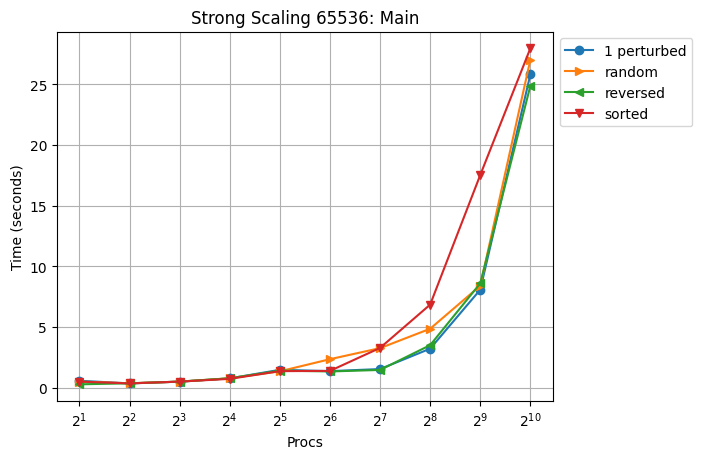

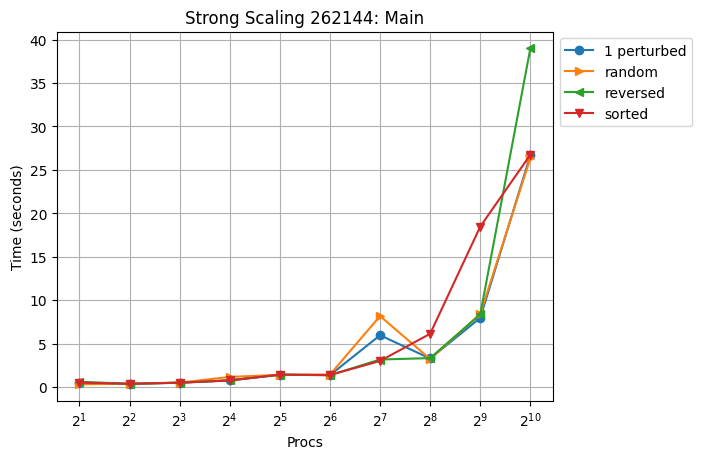

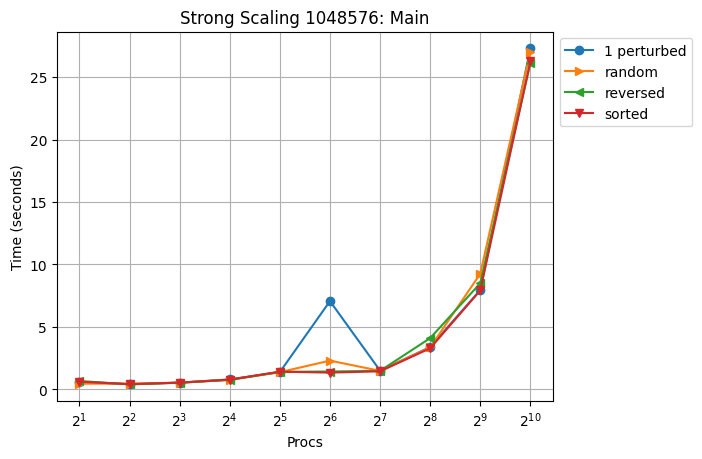

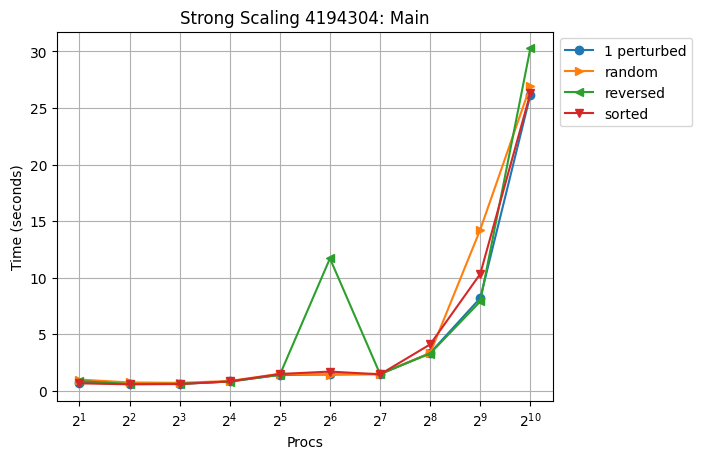

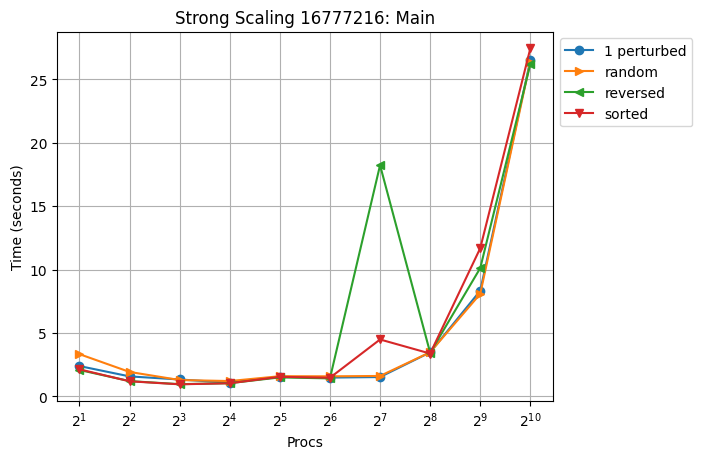

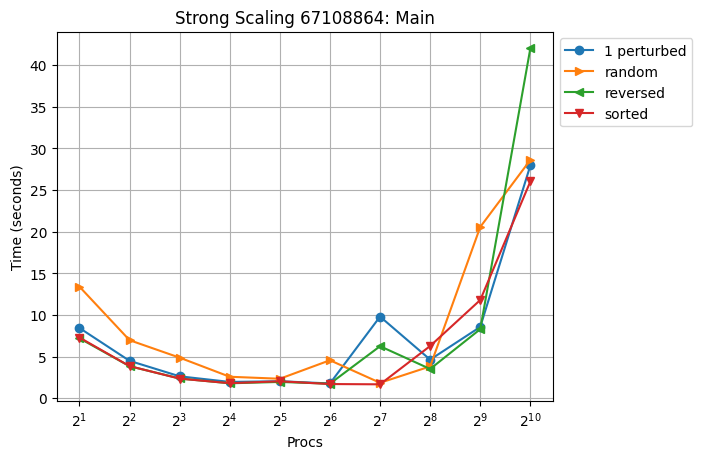

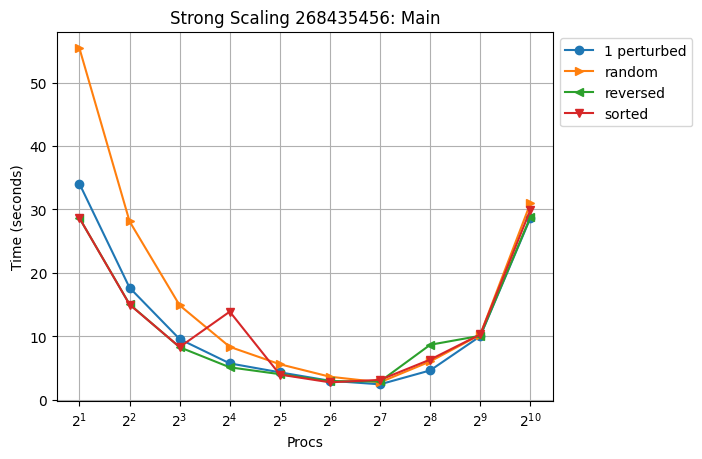

In [32]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["main"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["main"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["main"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["main"],
        title=f"Strong Scaling {sizes[i]}: Main",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

# Plot of 2

In [28]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

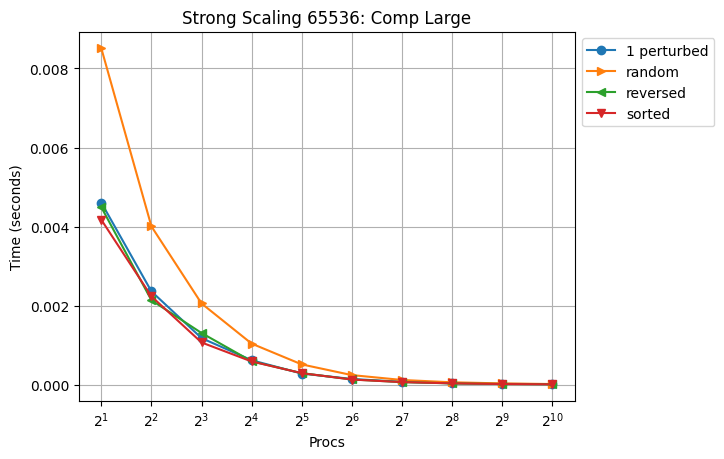

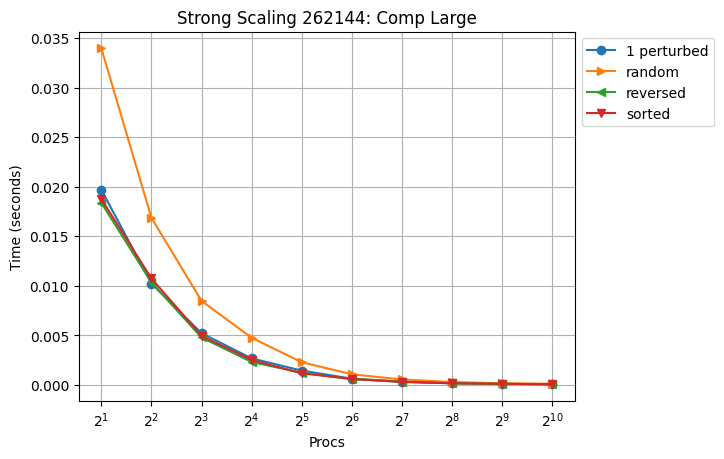

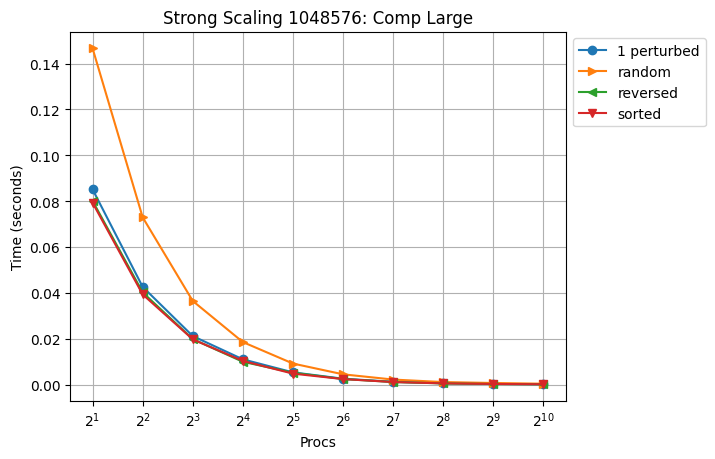

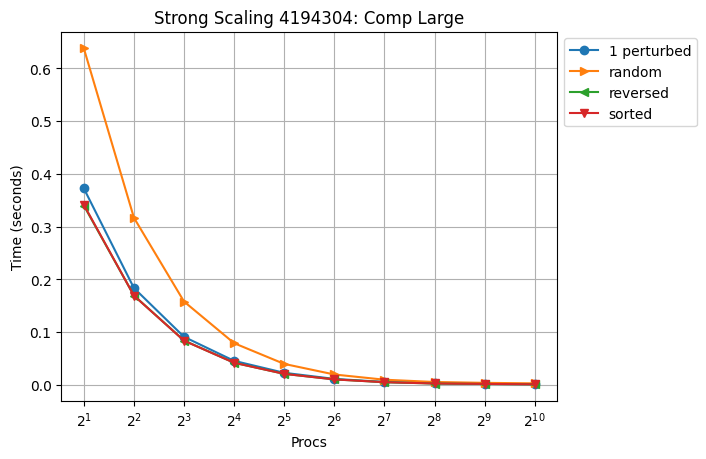

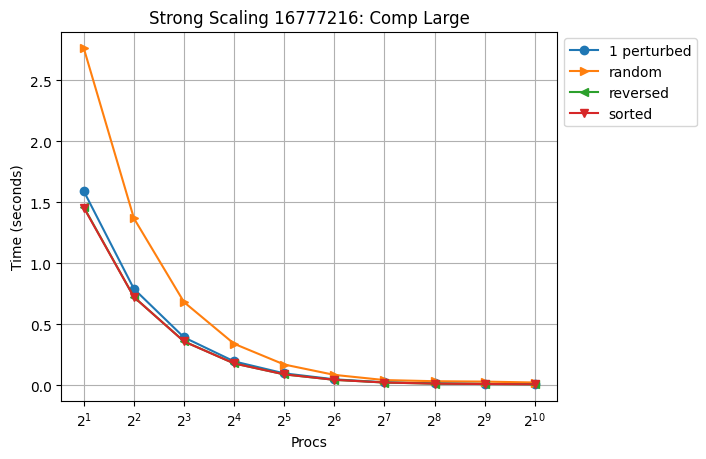

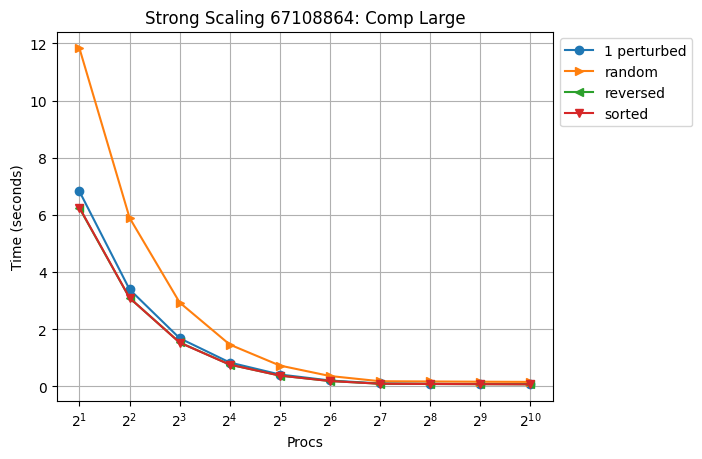

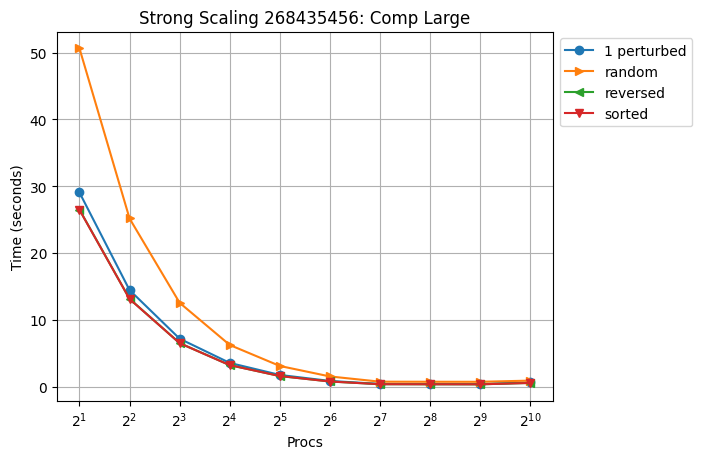

In [29]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comp_large"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comp_large"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comp_large"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comp_large"],
        title=f"Strong Scaling {sizes[i]}: Comp Large",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

## Comm Graphs (for 3 then 2)

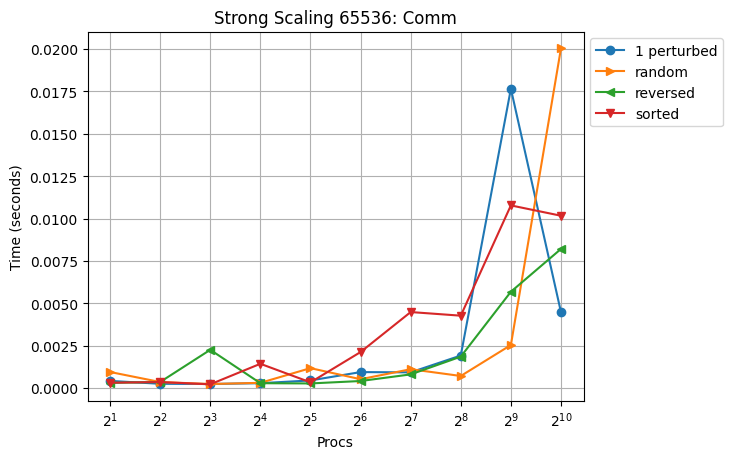

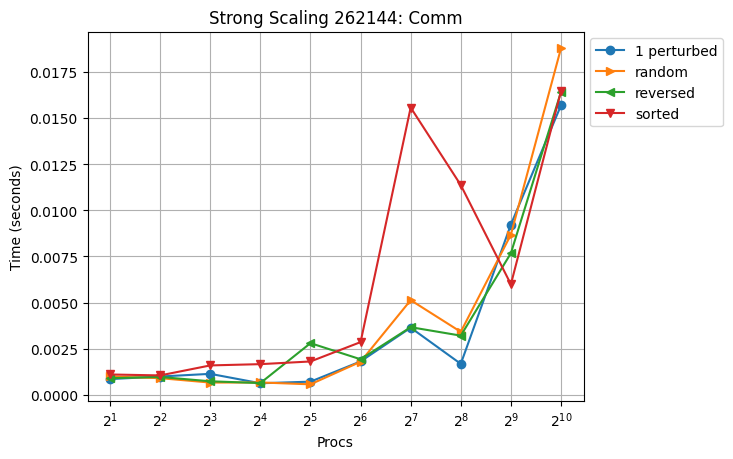

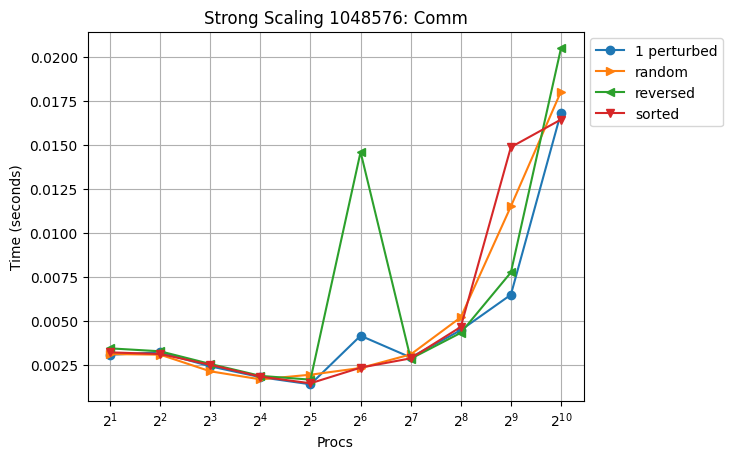

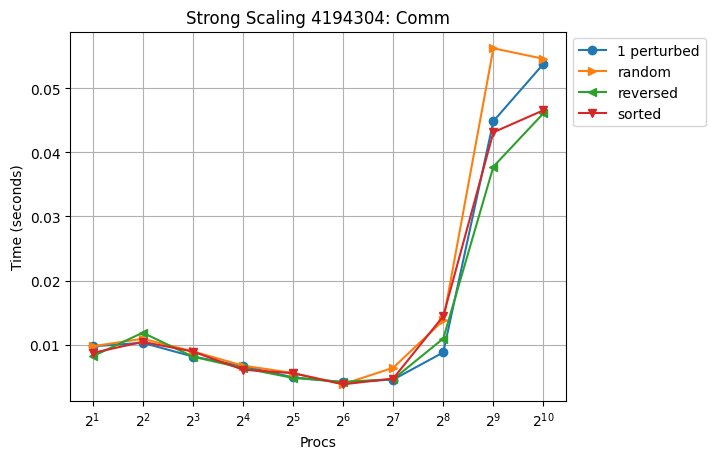

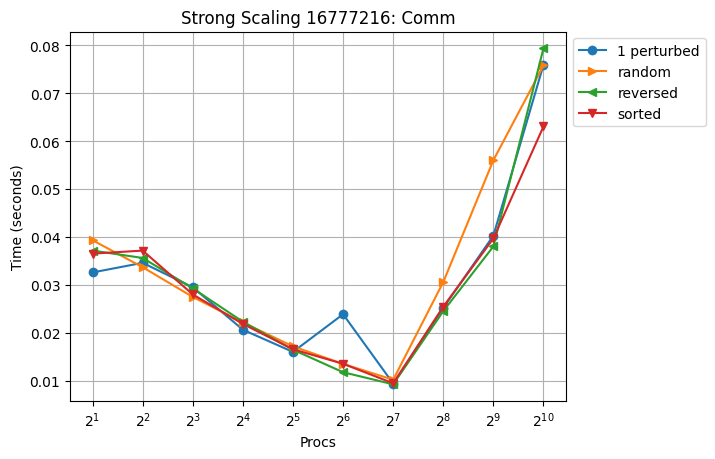

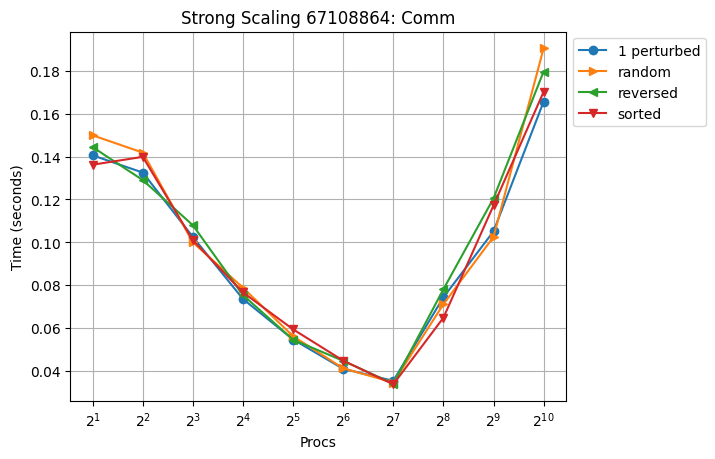

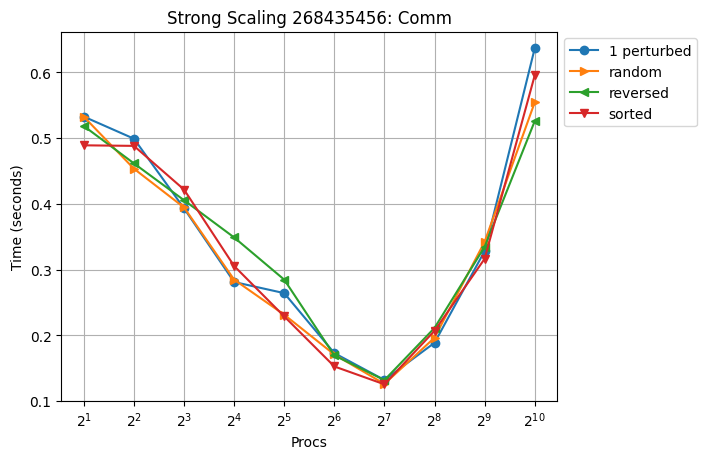

In [31]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comm"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comm"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comm"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comm"],
        title=f"Strong Scaling {sizes[i]}: Comm",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1